In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma
import warnings
warnings.filterwarnings('ignore')

C:\Users\kesha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data= pd.read_csv('CarPrice_Assignment.csv')
pd.set_option("display.max_columns",50)
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data.select_dtypes(exclude=np.number)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [4]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [5]:
catcols=['aspiration','doornumber',
        'carbody','drivewheel','enginelocation','enginetype','cylindernumber',
        'fuelsystem','fueltype','symboling']


In [6]:
numcols= ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm', 'citympg', 'highwaympg','price']

In [7]:
data.shape


(205, 26)

<Axes: >

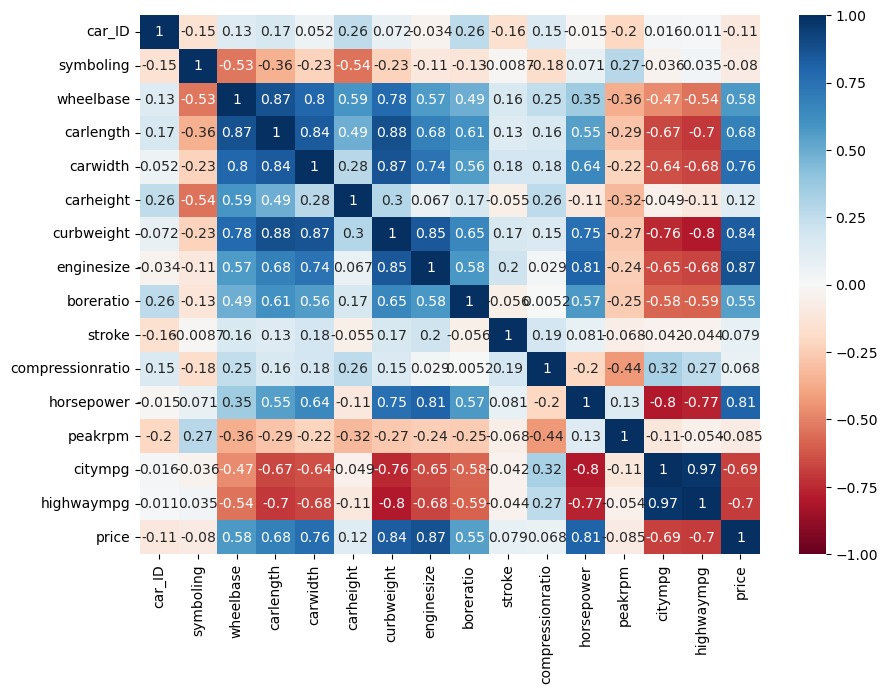

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1)

## Univariate Analysis


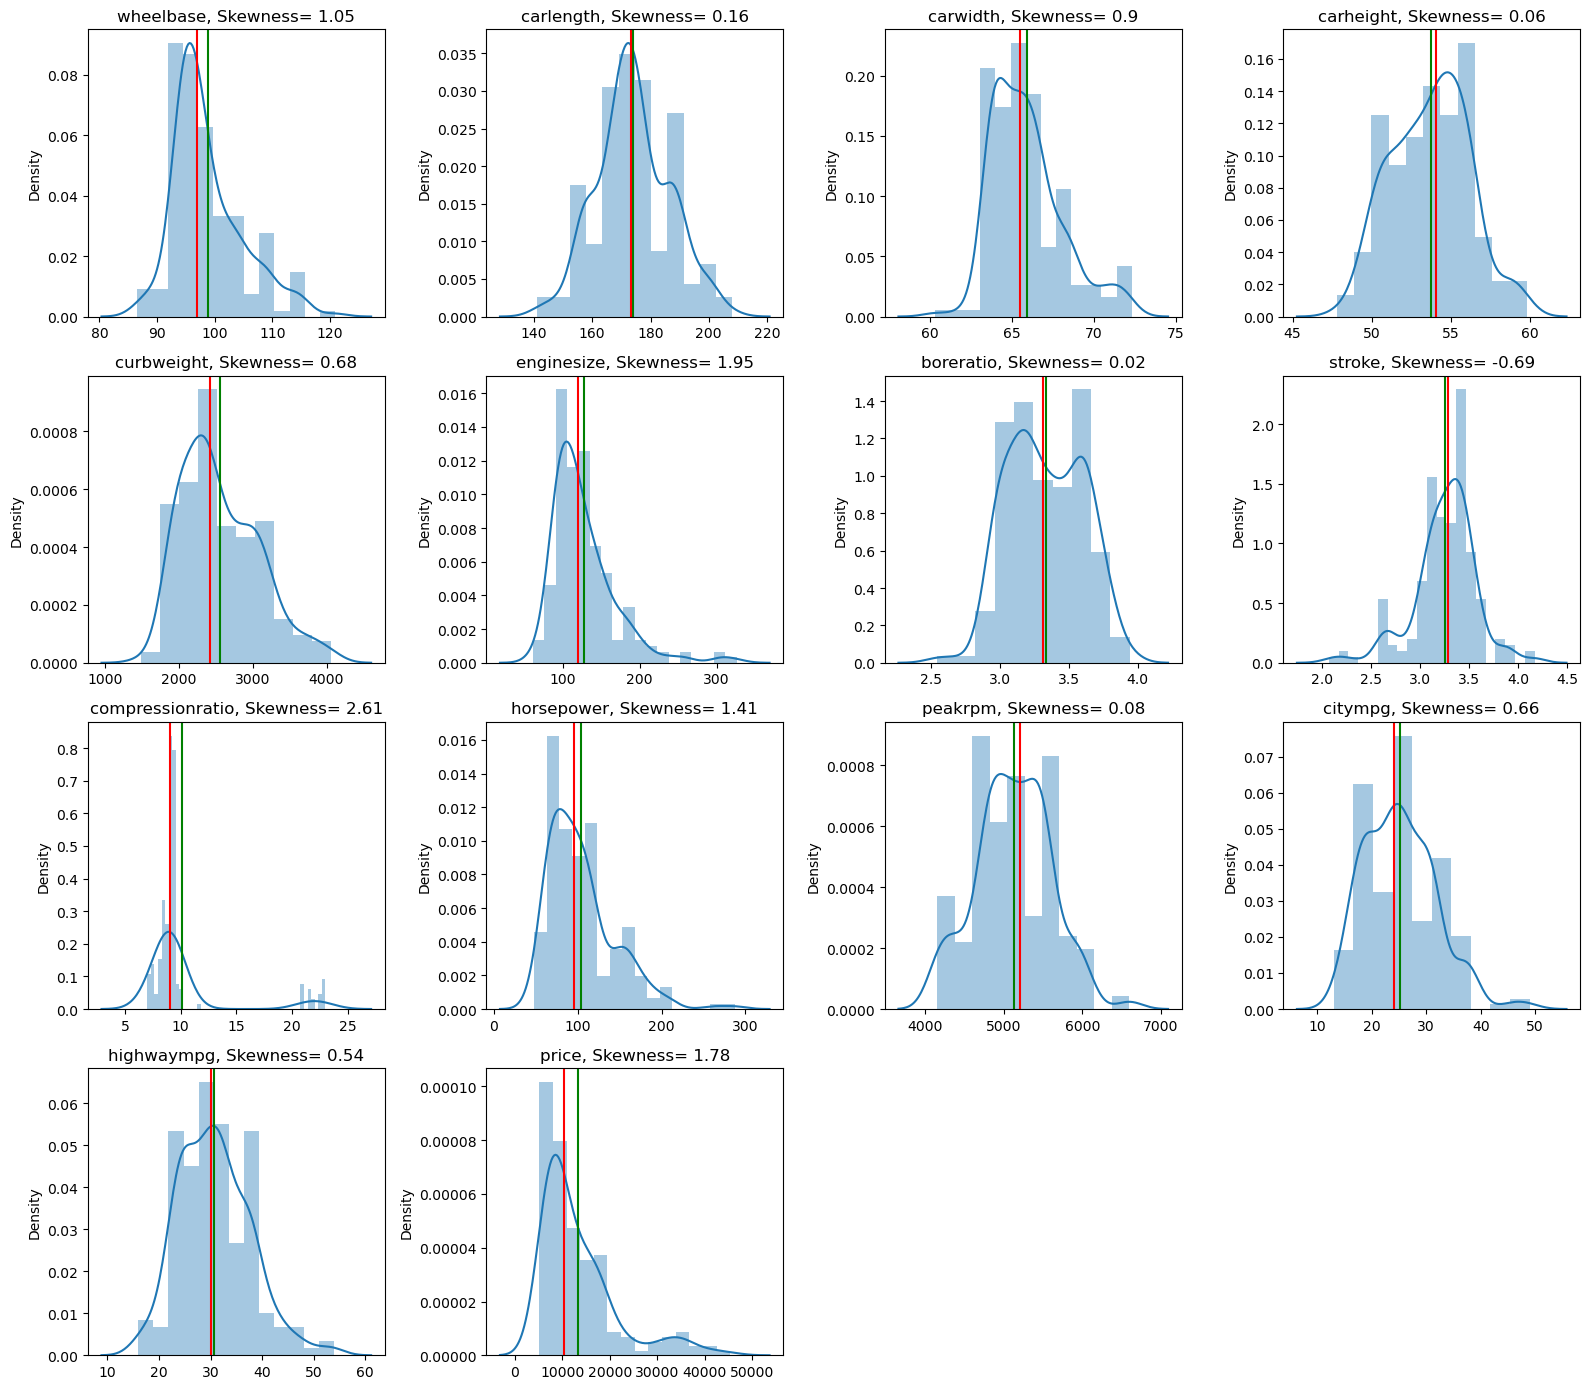

In [9]:
plt.figure(figsize=(16,14))
t=1
for i in numcols:
    plt.subplot(4,4,t)
    sns.distplot(x=data[i])
    plt.title(f'{i}, Skewness= {round(data[i].skew(),2)}')
    plt.axvline(x= data[i].mean(),color='g')
    plt.axvline(x= data[i].median(),color='r')
    t+=1
plt.tight_layout()
plt.show()

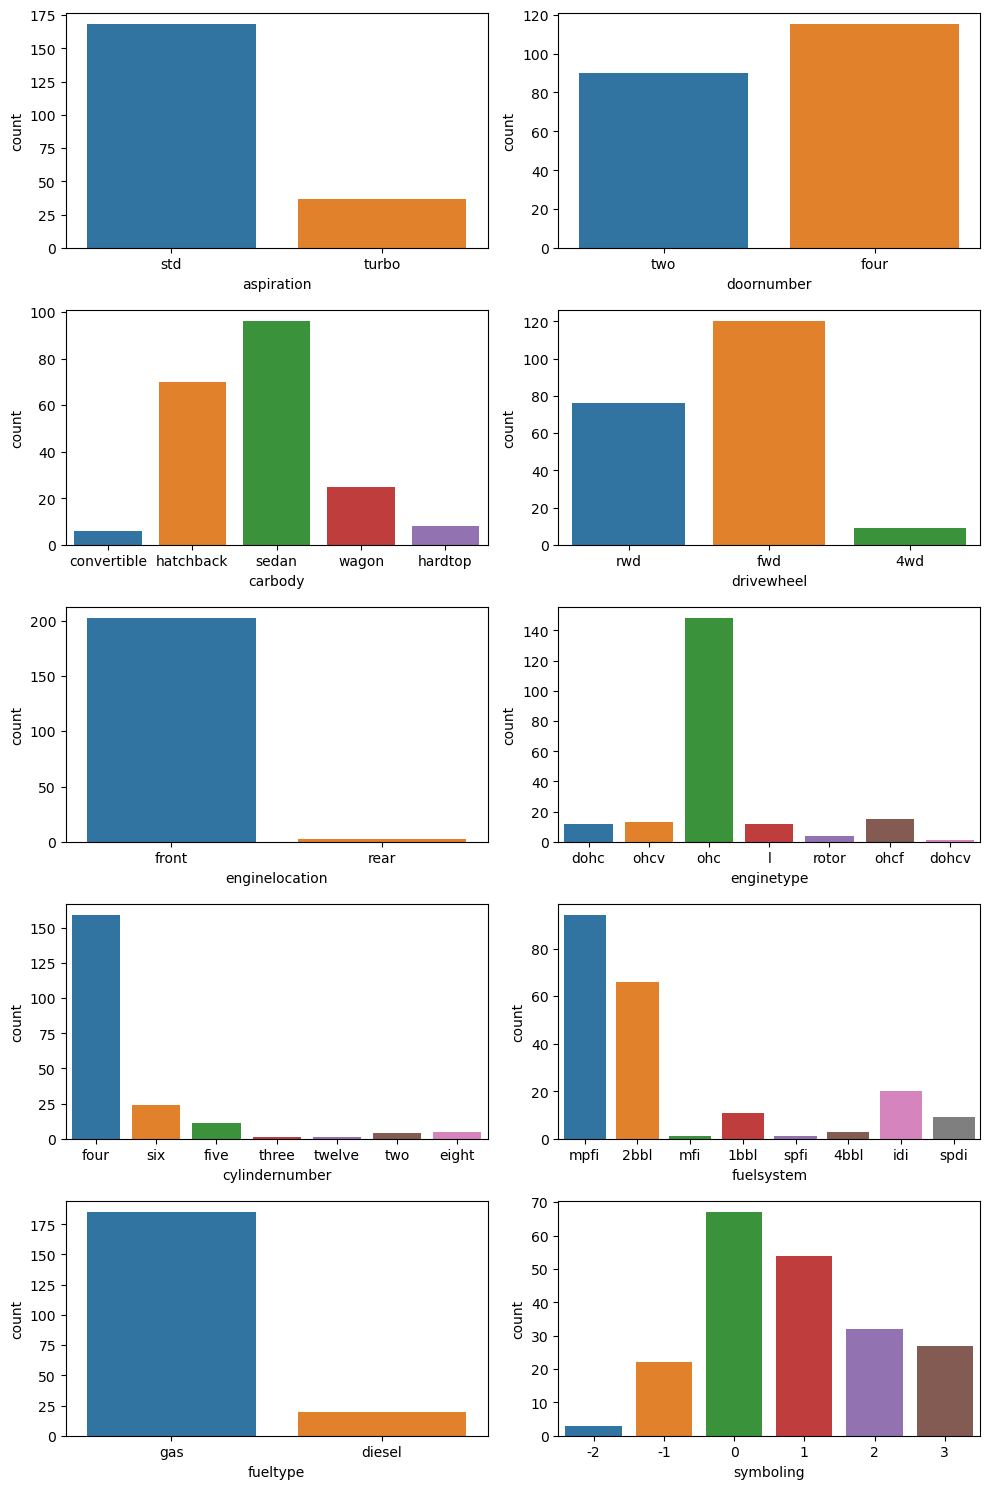

In [10]:
plt.figure(figsize=(10,15))
t=1
for i in catcols:
    plt.subplot(5,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [11]:
data.groupby(by='fuelsystem')['price'].count()

fuelsystem
1bbl    11
2bbl    66
4bbl     3
idi     20
mfi      1
mpfi    94
spdi     9
spfi     1
Name: price, dtype: int64

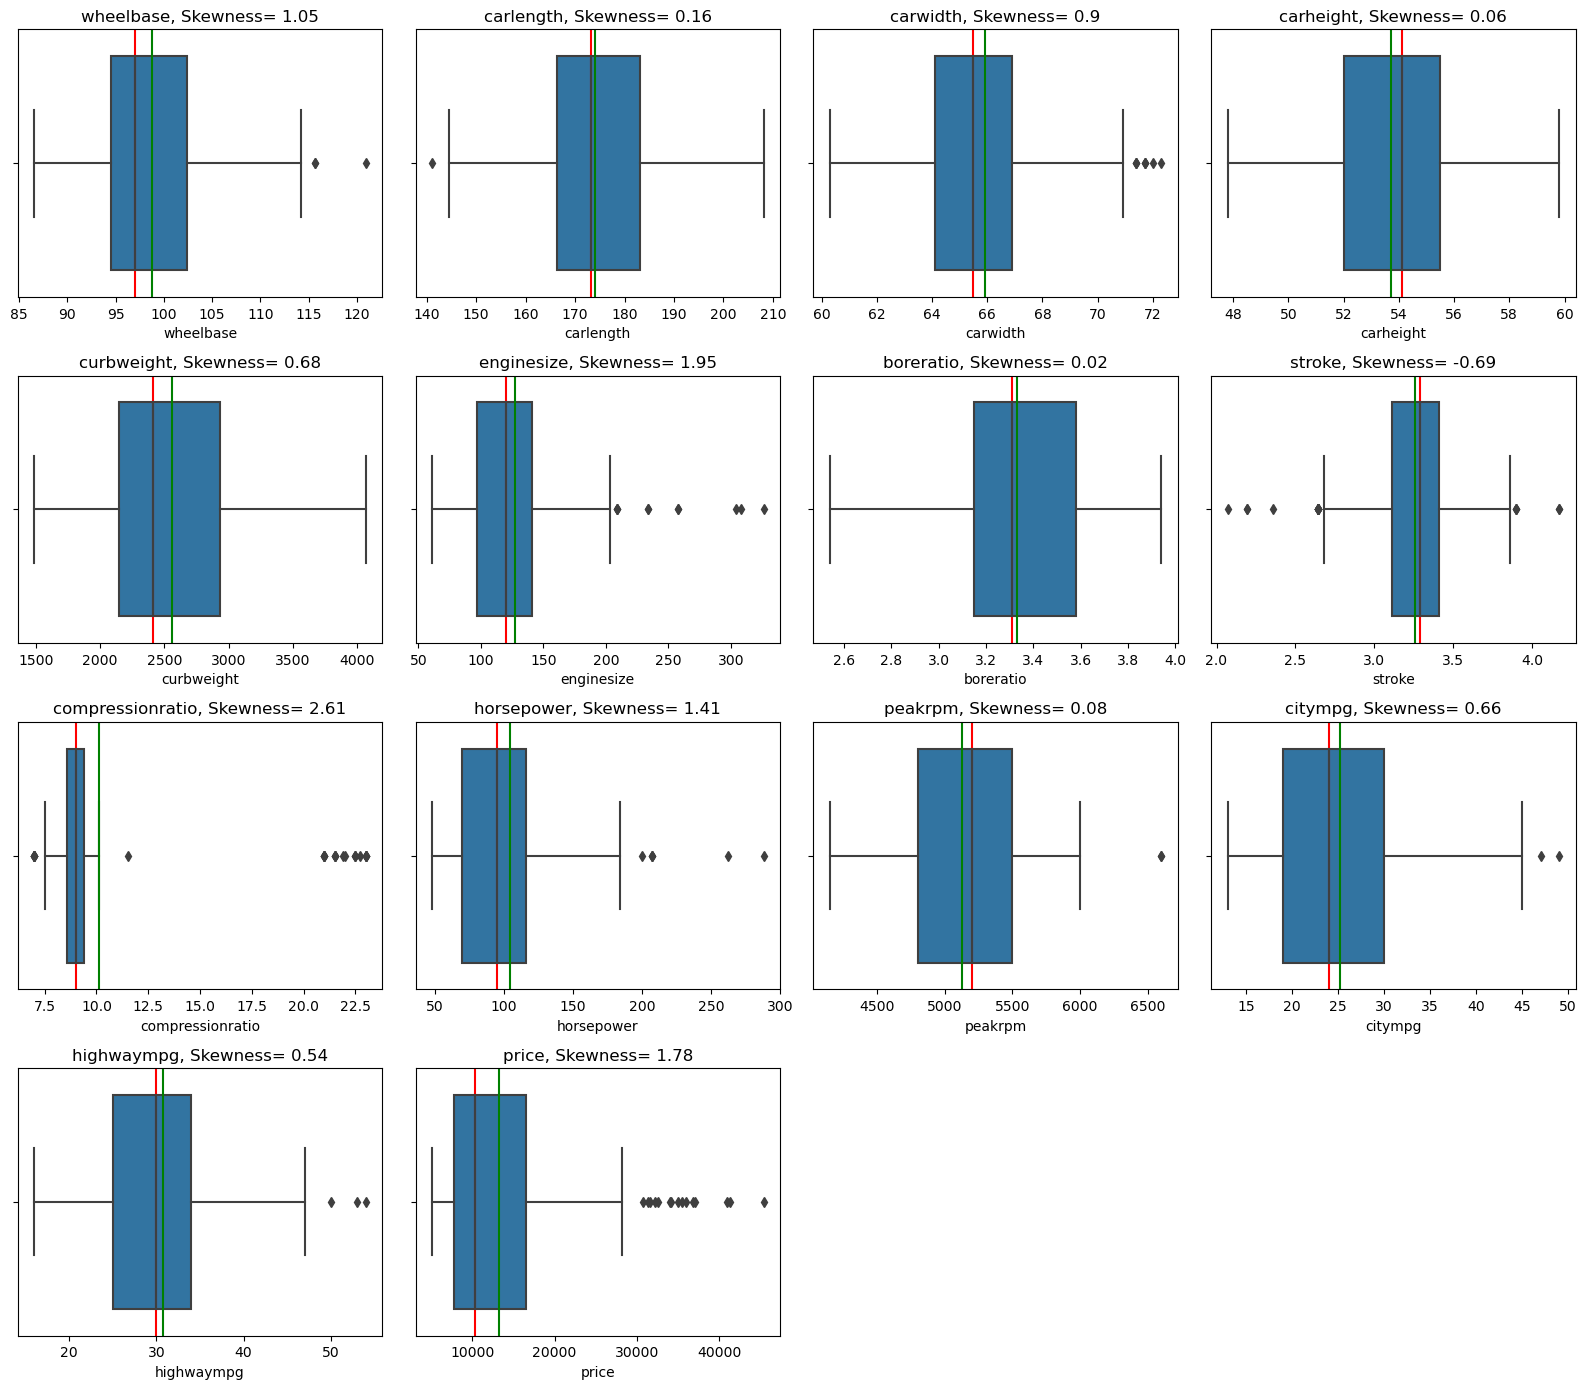

In [12]:
# outliers

plt.figure(figsize=(16,14))
t=1
for i in numcols:
    plt.subplot(4,4,t)
    sns.boxplot(x=data[i])
    plt.title(f'{i}, Skewness= {round(data[i].skew(),2)}')
    plt.axvline(x= data[i].mean(),color='g')
    plt.axvline(x= data[i].median(),color='r')
    t+=1
plt.tight_layout()
plt.show()

In [13]:
data['avgmpg']=data[['citympg','highwaympg']].mean(axis=1)

In [14]:
data.drop(columns=['citympg','highwaympg'],inplace=True)

In [15]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.5
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,22.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.5
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.5


In [16]:
data['fueltype']= np.where(data.fueltype=='gas',1,0)

In [17]:
data.aspiration= np.where(data.aspiration=='std',1,0)
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmpg
0,1,3,alfa-romero giulia,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,2,3,alfa-romero stelvio,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,3,1,alfa-romero Quadrifoglio,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,4,2,audi 100 ls,1,1,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,5,2,audi 100ls,1,1,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.5
201,202,-1,volvo 144ea,1,0,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,22.0
202,203,-1,volvo 244dl,1,1,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.5
203,204,-1,volvo 246,0,0,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.5


In [18]:
data.doornumber=np.where(data.doornumber=='four',1,0)
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmpg
0,1,3,alfa-romero giulia,1,1,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,2,3,alfa-romero stelvio,1,1,0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,3,1,alfa-romero Quadrifoglio,1,1,0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,4,2,audi 100 ls,1,1,1,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,5,2,audi 100ls,1,1,1,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,1,1,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.5
201,202,-1,volvo 144ea,1,0,1,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,22.0
202,203,-1,volvo 244dl,1,1,1,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.5
203,204,-1,volvo 246,0,0,1,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.5


In [19]:
data.enginelocation=np.where(data.enginelocation=='front',1,0)
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,avgmpg
0,1,3,alfa-romero giulia,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,2,3,alfa-romero stelvio,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,3,1,alfa-romero Quadrifoglio,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,4,2,audi 100 ls,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,5,2,audi 100ls,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.5
201,202,-1,volvo 144ea,1,0,1,sedan,rwd,1,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,22.0
202,203,-1,volvo 244dl,1,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.5
203,204,-1,volvo 246,0,0,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.5


In [20]:
data.loc[:,['price','carlength','carheight','carwidth']].corr()

,price,carlength,carheight,carwidth
price,1.000000,0.682920,0.119336,0.759325
carlength,0.682920,1.000000,0.491029,0.841118
carheight,0.119336,0.491029,1.000000,0.279210
carwidth,0.759325,0.841118,0.279210,1.000000


In [21]:
data.drop(['peakrpm','compressionratio','stroke','symboling','car_ID'],inplace=True,axis=1)

In [22]:
data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,avgmpg
0,alfa-romero giulia,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,13495.0,24.0
1,alfa-romero stelvio,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111,16500.0,24.0
2,alfa-romero Quadrifoglio,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154,16500.0,22.5
3,audi 100 ls,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102,13950.0,27.0
4,audi 100ls,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),1,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,114,16845.0,25.5
201,volvo 144ea,1,0,1,sedan,rwd,1,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,160,19045.0,22.0
202,volvo 244dl,1,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,134,21485.0,20.5
203,volvo 246,0,0,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,106,22470.0,26.5


In [23]:
def engine(x):
    if x=='ohc':
        return('ohc')
    else:
        return('other')

In [24]:
data.enginetype= data.enginetype.transform(engine)

In [25]:
data.enginetype.unique()

array(['other', 'ohc'], dtype=object)

In [26]:
def flsys(x):
    if x in ['2bbl','mpfi']:
        return('common')
    else:
        return('uncommon')

In [27]:
data.fuelsystem=data.fuelsystem.transform(flsys)
data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,avgmpg
0,alfa-romero giulia,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,other,four,130,common,3.47,111,13495.0,24.0
1,alfa-romero stelvio,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,other,four,130,common,3.47,111,16500.0,24.0
2,alfa-romero Quadrifoglio,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,other,six,152,common,2.68,154,16500.0,22.5
3,audi 100 ls,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,common,3.19,102,13950.0,27.0
4,audi 100ls,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,common,3.19,115,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),1,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,2952,ohc,four,141,common,3.78,114,16845.0,25.5
201,volvo 144ea,1,0,1,sedan,rwd,1,109.1,188.8,68.8,55.5,3049,ohc,four,141,common,3.78,160,19045.0,22.0
202,volvo 244dl,1,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3012,other,six,173,common,3.58,134,21485.0,20.5
203,volvo 246,0,0,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3217,ohc,six,145,uncommon,3.01,106,22470.0,26.5


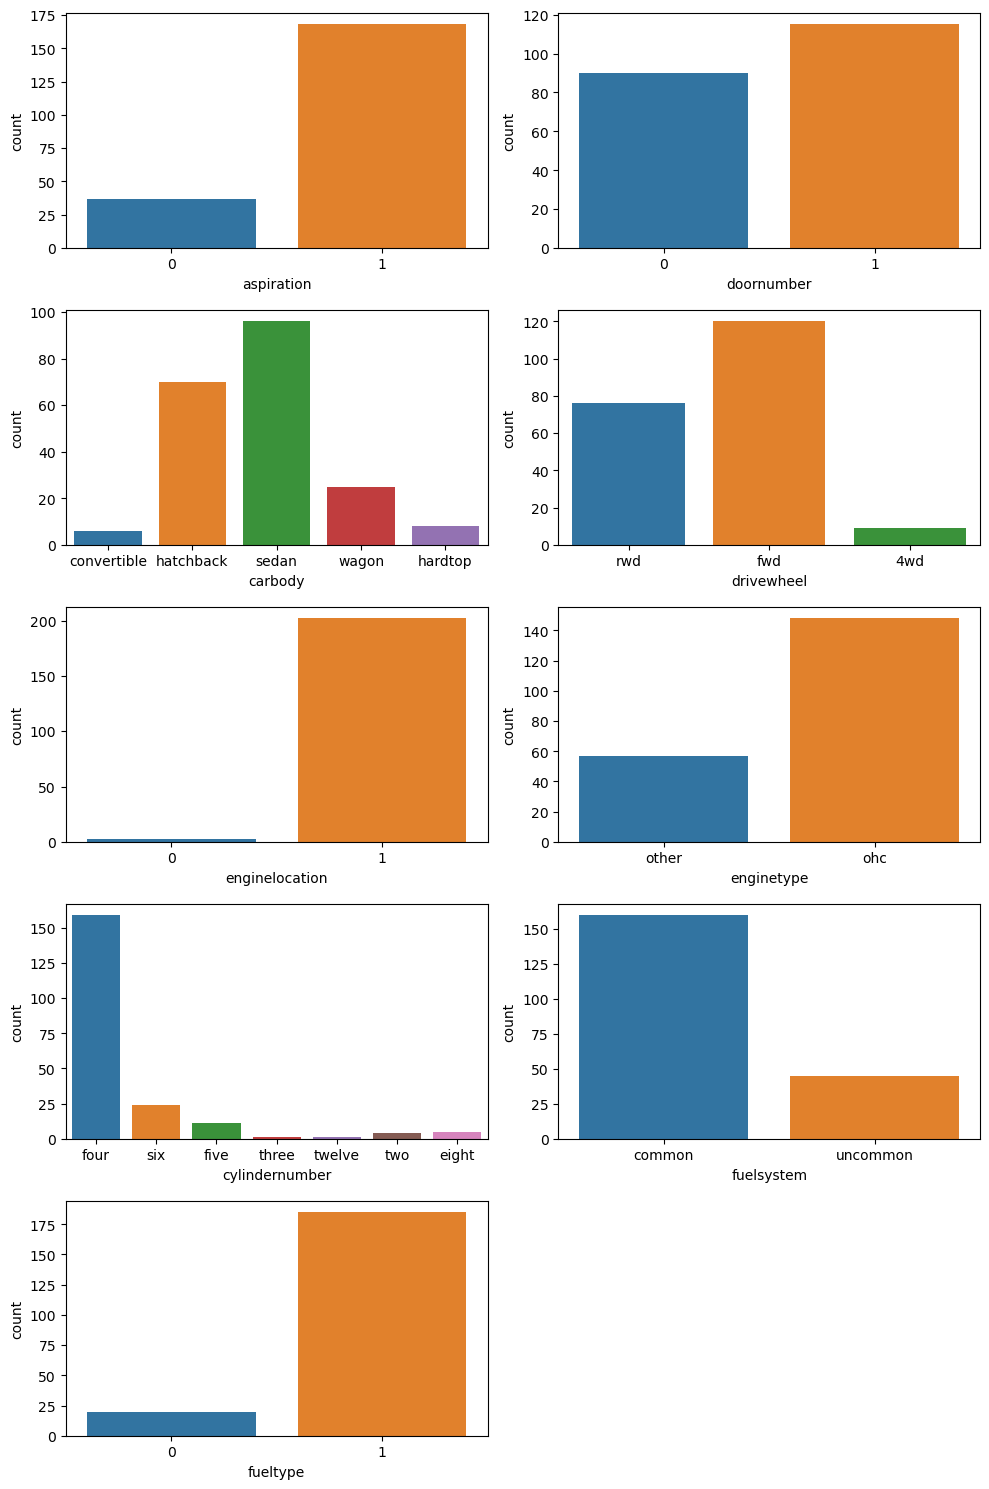

In [28]:
plt.figure(figsize=(10,15))
t=1
for i in ['aspiration','doornumber',
        'carbody','drivewheel','enginelocation','enginetype','cylindernumber',
        'fuelsystem','fueltype']:
    plt.subplot(5,2,t)
    sns.countplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [29]:
def cylnum(x):
    if x =='four':
        return('four cylinder')
    else:
        return('other')

In [30]:
data.cylindernumber=data.cylindernumber.transform(cylnum)
data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,avgmpg
0,alfa-romero giulia,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,other,four cylinder,130,common,3.47,111,13495.0,24.0
1,alfa-romero stelvio,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,other,four cylinder,130,common,3.47,111,16500.0,24.0
2,alfa-romero Quadrifoglio,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,other,other,152,common,2.68,154,16500.0,22.5
3,audi 100 ls,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four cylinder,109,common,3.19,102,13950.0,27.0
4,audi 100ls,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,other,136,common,3.19,115,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),1,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,2952,ohc,four cylinder,141,common,3.78,114,16845.0,25.5
201,volvo 144ea,1,0,1,sedan,rwd,1,109.1,188.8,68.8,55.5,3049,ohc,four cylinder,141,common,3.78,160,19045.0,22.0
202,volvo 244dl,1,1,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3012,other,other,173,common,3.58,134,21485.0,20.5
203,volvo 246,0,0,1,sedan,rwd,1,109.1,188.8,68.9,55.5,3217,ohc,other,145,uncommon,3.01,106,22470.0,26.5


In [31]:
data.loc[:,['avgmpg','price']].corr()

,avgmpg,price
avgmpg,1.000000,-0.696835
price,-0.696835,1.000000


<Axes: xlabel='price', ylabel='avgmpg'>

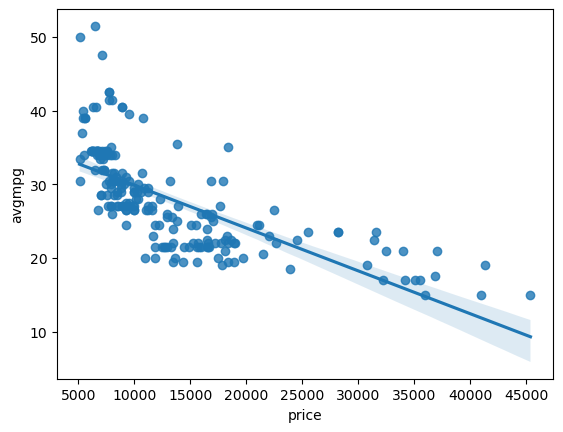

In [32]:
sns.regplot(data=data,y=data.avgmpg,x=data.price)

<Axes: >

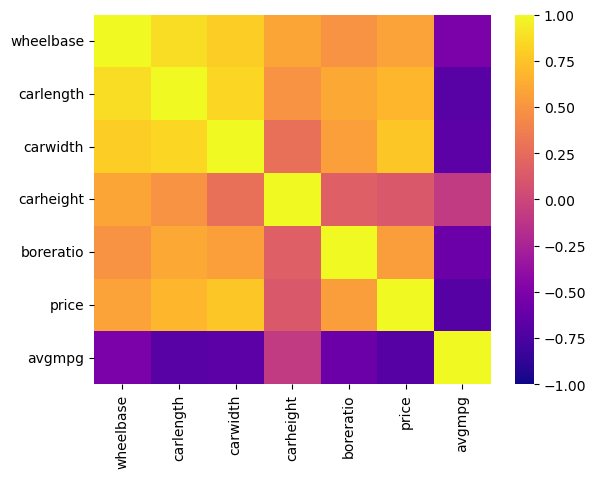

In [33]:
sns.heatmap(data.select_dtypes(include=float).corr(),vmin=-1,vmax=1,cmap='plasma')

In [34]:
data.drop(columns=['CarName'],inplace=True)

In [35]:
dummy= pd.get_dummies(data,dtype=int)

In [36]:
dummy.shape,data.shape

((205, 28), (205, 19))

In [37]:
dummy

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,price,avgmpg,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_ohc,enginetype_other,cylindernumber_four cylinder,cylindernumber_other,fuelsystem_common,fuelsystem_uncommon
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,111,13495.0,24.0,1,0,0,0,0,0,0,1,0,1,1,0,1,0
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,111,16500.0,24.0,1,0,0,0,0,0,0,1,0,1,1,0,1,0
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,154,16500.0,22.5,0,0,1,0,0,0,0,1,0,1,0,1,1,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,102,13950.0,27.0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,115,17450.0,20.0,0,0,0,1,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,1,1,109.1,188.8,68.9,55.5,2952,141,3.78,114,16845.0,25.5,0,0,0,1,0,0,0,1,1,0,1,0,1,0
201,1,0,1,1,109.1,188.8,68.8,55.5,3049,141,3.78,160,19045.0,22.0,0,0,0,1,0,0,0,1,1,0,1,0,1,0
202,1,1,1,1,109.1,188.8,68.9,55.5,3012,173,3.58,134,21485.0,20.5,0,0,0,1,0,0,0,1,0,1,0,1,1,0
203,0,0,1,1,109.1,188.8,68.9,55.5,3217,145,3.01,106,22470.0,26.5,0,0,0,1,0,0,0,1,1,0,0,1,0,1


In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler

In [39]:
x = dummy.drop(columns=['price'])
y= dummy['price']

In [40]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,shuffle=True,random_state=3)

In [41]:
lr= LinearRegression()

In [42]:
model= lr.fit(xtrain,ytrain)

In [43]:
pred=model.predict(xtest)
print('RMSE:',np.sqrt(mean_squared_error(ytest,pred)))

RMSE: 3085.544250340024


In [44]:
base_model = sma.OLS(y,sma.add_constant(x)).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     71.43
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.93e-77
Time:                        13:44:13   Log-Likelihood:                -1900.3
No. Observations:                 205   AIC:                             3847.
Df Residuals:                     182   BIC:                             3923.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.777e+04   4516.586     -3.935      0.000   -2.67e+04   -8861.171
fueltype                       583.8011   1337.404      0.437      0.663   -2055.010    3222.612
aspiration                    -484.7550    770.563     -0.629      0.530   -2005.140    1035.630
doornumber                    -553.8656    641.598     -0.863      0.389   -1819.792     712.061
enginelocation               -1.229e+04   2134.846     -5.759      0.000   -1.65e+04   -8081.989
wheelbase                      175.9522     99.331      1.771      0.078     -20.037     371.941
carlength                      -45.7397     54.053     -0.846      0.399    -152.391      60.912
carwidth                       757.5728    232.401      3.260      0.001     299.026    1216.120
carheight                      133.8967    135.658      0.987      0.325    -133.769     401.562
curbweight                       0.9410      1.898      0.496      0.621      -2.803       4.685
enginesize                      64.3628     13.971      4.607      0.000      36.798      91.928
boreratio                     -114.3072   1232.409     -0.093      0.926   -2545.954    2317.340
horsepower                      31.3156     15.065      2.079      0.039       1.592      61.039
avgmpg                          38.8802     75.255      0.517      0.606    -109.605     187.365
carbody_convertible            409.1328   1293.209      0.316      0.752   -2142.478    2960.743
carbody_hardtop              -4747.3774   1330.373     -3.568      0.000   -7372.314   -2122.440
carbody_hatchback            -4857.7997   1066.873     -4.553      0.000   -6962.829   -2752.770
carbody_sedan                -3585.8690   1096.210     -3.271      0.001   -5748.784   -1422.954
carbody_wagon                -4990.8614   1231.643     -4.052      0.000   -7420.997   -2560.725
drivewheel_4wd               -5519.8933   1617.234     -3.413      0.001   -8710.832   -2328.955
drivewheel_fwd               -7086.6028   1665.075     -4.256      0.000   -1.04e+04   -3801.270
drivewheel_rwd               -5166.2787   1577.501     -3.275      0.001   -8278.821   -2053.737
enginetype_ohc               -8061.2655   2300.910     -3.504      0.001   -1.26e+04   -3521.377
enginetype_other             -9711.5092   2247.318     -4.321      0.000   -1.41e+04   -5277.362
cylindernumber_four cylinder -1.068e+04   2319.428     -4.604      0.000   -1.53e+04   -6102.496
cylindernumber_other         -7093.8530   2269.191     -3.126      0.002   -1.16e+04   -2616.549
fuelsystem_common            -8936.5304   2378.887     -3.757      0.000   -1.36e+04   -4242.786
fuelsystem_uncommon          -8836.2443   2186.765     -4.041      0.000   -1.32e+04   -4521.573
============================================================================

In [45]:
sc = MinMaxScaler()
rb= RobustScaler()
xscaled = sc.fit_transform(x)
rbscaled= rb.fit_transform(x)

In [46]:
pd.DataFrame(rbscaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,-1.0,0.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.227273,0.372093,0.347826,-0.315789,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-1.0,0.0,-1.063291,-0.261905,-0.500000,-1.514286,0.169620,0.227273,0.372093,0.347826,-0.315789,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-1.0,0.0,-0.316456,-0.119048,0.000000,-0.485714,0.517722,0.727273,-1.465116,1.282609,-0.473684,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.354430,0.202381,0.250000,0.057143,-0.097468,-0.250000,-0.279070,0.152174,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.303797,0.202381,0.321429,0.057143,0.518987,0.363636,-0.279070,0.434783,-0.736842,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,1.531646,0.928571,1.214286,0.400000,0.681013,0.477273,1.093023,0.413043,-0.157895,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,-1.0,0.0,0.0,1.531646,0.928571,1.178571,0.400000,0.803797,0.477273,1.093023,1.413043,-0.526316,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,1.531646,0.928571,1.214286,0.400000,0.756962,1.204545,0.627907,0.847826,-0.684211,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.0
203,-1.0,-1.0,0.0,0.0,1.531646,0.928571,1.214286,0.400000,1.016456,0.568182,-0.697674,0.239130,-0.052632,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,1.0


In [47]:
pd.DataFrame(xscaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,1.0,1.0,0.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.262500,0.246575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.262500,0.246575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.0,1.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.441667,0.205479,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.225000,0.328767,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,1.0,1.0,1.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.279167,0.136986,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,1.0,1.0,1.0,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.275000,0.287671,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
201,1.0,0.0,1.0,1.0,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.466667,0.191781,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
202,1.0,1.0,1.0,1.0,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.358333,0.150685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
203,0.0,0.0,1.0,1.0,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.241667,0.315068,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the models

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'SVR': SVR(kernel='linear'),
    'KNN Regression': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100)
}

# Define evaluation metrics

metrics = {
    'MSE': make_scorer(mean_squared_error),
    'R-squared': make_scorer(r2_score),
}

# List to store individual DataFrames

dfs = []

# Iterate through the models and evaluate them

for model_name, model in models.items():
    mse_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring=metrics['MSE'])
    r2_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring=metrics['R-squared'])
    
    # Create a DataFrame for the current model evaluation
   
    model_df = pd.DataFrame({
        'Model': model_name,
        'MSE': mse_scores.mean(),
        'R-squared': r2_scores.mean()*100
    }, index=[0])                # Make sure to set index to [0] to ensure proper concatenation
    dfs.append(model_df)

# Concatenate all individual DataFrames into one

results_df = pd.concat(dfs, ignore_index=True)

# Display the results DataFrame

print(results_df)

                          Model           MSE  R-squared
0             Linear Regression  1.083236e+07  80.766271
1              Ridge Regression  1.042659e+07  81.353259
2              Lasso Regression  1.073298e+07  80.946311
3         ElasticNet Regression  1.214824e+07  77.893199
4      Decision Tree Regression  8.295026e+06  83.466375
5      Random Forest Regression  5.629364e+06  88.769110
6                           SVR  1.539356e+07  73.512315
7                KNN Regression  1.693532e+07  70.316524
8  Gradient Boosting Regression  5.766142e+06  89.747481


In [49]:
# Gradient boosting is working best here